In [1]:
##Let's get the dataset

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_tr, y_tr),(x_te,y_te) = mnist.load_data()

In [4]:
# How many samples have we got?

In [5]:
x_tr.shape # 60K samples of 28x28!

(60000, 28, 28)

In [6]:
y_tr.shape #60K labels...one label per sample

(60000,)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

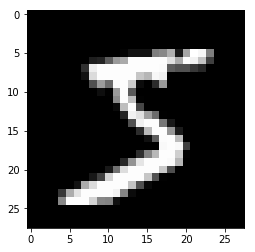

In [8]:
plt.imshow(x_tr[0], cmap='gray') #the first sample is a 5

In [9]:
y_tr[0] #then, the first label is a 5

5

In [10]:
set(y_tr) #we have 10 different classes! 

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

## Data preprocessing

### Data normalization - values from 0 to 1

In [11]:
x_tr = x_tr.astype('float32')/255.
x_te = x_te.astype('float32')/255.

### Data vectorization - a vector of 28*28 elements per image, just to fit our NN input

In [12]:
x_tr = x_tr.reshape((x_tr.shape[0], (28*28)))
x_te = x_te.reshape((x_te.shape[0], (28*28)))

In [13]:
x_tr.shape

(60000, 784)

### Labels to categorical - one hot encoded vector

In [14]:
from keras.utils import to_categorical

In [15]:
y_tr = to_categorical(y_tr)
y_te = to_categorical(y_te)

In [16]:
y_tr[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

## Let's build our model

In [17]:
from keras import models, layers #packages

## 1- Let's create a regular model

In [18]:
#A function to create the model
def build_regular_model():
    model = models.Sequential()
    
    model.add(layers.Dense(128, activation='relu', input_shape=(28*28,)))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    
    return model

In [19]:
reg_model = build_regular_model() #Create the model

In [20]:
reg_hist = reg_model.fit(x_tr, y_tr, epochs=10, batch_size=128, validation_data=(x_te,y_te)) #train the model

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.3371 - acc: 0.9066 - val_loss: 0.1908 - val_acc: 0.9454
Epoch 2/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.1597 - acc: 0.9532 - val_loss: 0.1306 - val_acc: 0.9587
Epoch 3/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.1139 - acc: 0.9670 - val_loss: 0.1074 - val_acc: 0.9684
Epoch 4/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0889 - acc: 0.9735 - val_loss: 0.0982 - val_acc: 0.9711
Epoch 5/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0721 - acc: 0.9791 - val_loss: 0.0867 - val_acc: 0.9735
Epoch 6/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0602 - acc: 0.9829 - val_loss: 0.0803 - val_acc: 0.9747
Epoch 7/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0515 - acc: 0.9846 - val_loss: 0.0810 - val_acc

In [21]:
reg_hist = reg_hist.history

In [22]:
reg_hist.keys()

['acc', 'loss', 'val_acc', 'val_loss']

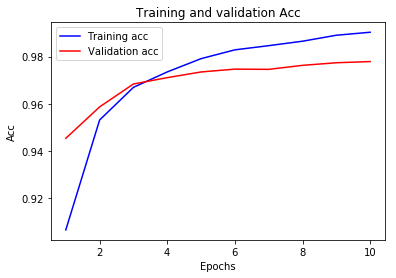

In [23]:
epochs = range(1, len(reg_hist['acc'])+1)
plt.plot(epochs, reg_hist['acc'], 'b', label='Training acc')
plt.plot(epochs, reg_hist['val_acc'], 'r', label='Validation acc')
plt.title('Training and validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

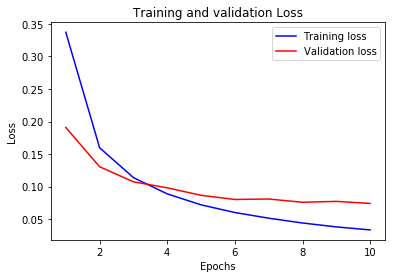

In [24]:
epochs = range(1, len(reg_hist['acc'])+1)
plt.plot(epochs, reg_hist['loss'], 'b', label='Training loss')
plt.plot(epochs, reg_hist['val_loss'], 'r', label='Validation loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 2- Let's create a complex model - Overfitting

In [25]:
#A function to create complex model
def build_complex_model():
    model = models.Sequential()
    
    model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    
    return model

In [26]:
complex_model = build_complex_model()

In [27]:
compl_hist = complex_model.fit(x_tr, y_tr, epochs=10, batch_size=128, validation_data=(x_te,y_te))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 21s 358us/step - loss: 0.2132 - acc: 0.9338 - val_loss: 0.1024 - val_acc: 0.9683
Epoch 2/10
60000/60000 [==============================] - 16s 274us/step - loss: 0.0814 - acc: 0.9750 - val_loss: 0.0849 - val_acc: 0.9744
Epoch 3/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.0540 - acc: 0.9837 - val_loss: 0.0831 - val_acc: 0.9768
Epoch 4/10
60000/60000 [==============================] - 16s 260us/step - loss: 0.0386 - acc: 0.9886 - val_loss: 0.0827 - val_acc: 0.9795
Epoch 5/10
60000/60000 [==============================] - 15s 255us/step - loss: 0.0306 - acc: 0.9910 - val_loss: 0.0861 - val_acc: 0.9795
Epoch 6/10
60000/60000 [==============================] - 15s 258us/step - loss: 0.0238 - acc: 0.9926 - val_loss: 0.1254 - val_acc: 0.9722
Epoch 7/10
60000/60000 [==============================] - 16s 272us/step - loss: 0.0218 - acc: 0.9931 - val_loss: 0.

In [28]:
compl_hist = compl_hist.history

In [29]:
compl_hist.keys()

['acc', 'loss', 'val_acc', 'val_loss']

In [30]:
compl_hist['acc']

[0.93381666669845576,
 0.97499999999999998,
 0.98368333333333335,
 0.9885666666666667,
 0.99103333330154419,
 0.99260000003178916,
 0.99313333330154419,
 0.99493333333333334,
 0.99570000000000003,
 0.99650000003178918]

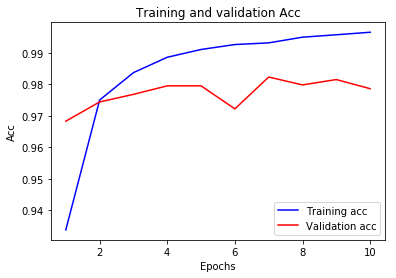

In [31]:
epochs = range(1, len(compl_hist['acc'])+1)
plt.plot(epochs, compl_hist['acc'], 'b', label='Training acc')
plt.plot(epochs, compl_hist['val_acc'], 'r', label='Validation acc')
plt.title('Training and validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

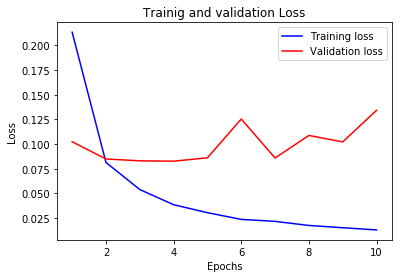

In [32]:
epochs = range(1, len(compl_hist['loss'])+1)

plt.plot(epochs, compl_hist['loss'], 'b', label='Training loss')
plt.plot(epochs, compl_hist['val_loss'], 'r', label='Validation loss')
plt.title('Trainig and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 3- Let's create a simple model - Underfitting

In [33]:
def build_simple_model():
    model = models.Sequential()
    
    model.add(layers.Dense(2, activation='relu', input_shape=(28*28,)))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    
    return model

In [34]:
simple_model = build_simple_model()

In [35]:
simpl_hist = simple_model.fit(x_tr, y_tr, epochs=10, batch_size=128, validation_data=(x_te,y_te))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 22us/step - loss: 1.9152 - acc: 0.2855 - val_loss: 1.7159 - val_acc: 0.3747
Epoch 2/10
60000/60000 [==============================] - 2s 26us/step - loss: 1.6021 - acc: 0.4174 - val_loss: 1.5119 - val_acc: 0.4715
Epoch 3/10
60000/60000 [==============================] - 2s 28us/step - loss: 1.4439 - acc: 0.5009 - val_loss: 1.3867 - val_acc: 0.5279
Epoch 4/10
60000/60000 [==============================] - 1s 24us/step - loss: 1.3420 - acc: 0.5466 - val_loss: 1.3001 - val_acc: 0.5667
Epoch 5/10
60000/60000 [==============================] - 2s 39us/step - loss: 1.2644 - acc: 0.5749 - val_loss: 1.2271 - val_acc: 0.5812
Epoch 6/10
60000/60000 [==============================] - 1s 22us/step - loss: 1.2034 - acc: 0.5844 - val_loss: 1.1731 - val_acc: 0.5930
Epoch 7/10
60000/60000 [==============================] - 1s 24us/step - loss: 1.1598 - acc: 0.5930 - val_loss: 1.1362 - val_acc

In [36]:
simpl_hist = simpl_hist.history

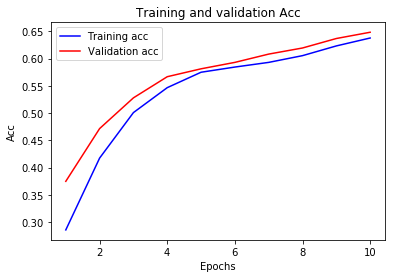

In [37]:
epochs = range(1, len(simpl_hist['loss'])+1)
plt.plot(epochs, simpl_hist['acc'], 'b', label='Training acc')
plt.plot(epochs, simpl_hist['val_acc'], 'r', label='Validation acc')
plt.title('Training and validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

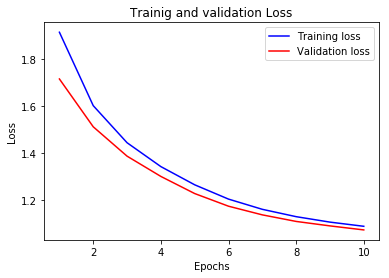

In [38]:
epochs = range(1, len(simpl_hist['loss'])+1)
plt.plot(epochs, simpl_hist['loss'], 'b', label='Training loss')
plt.plot(epochs, simpl_hist['val_loss'], 'r', label='Validation loss')
plt.title('Trainig and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()